# Prophet

In [67]:
# Packages
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.special import inv_boxcox
from statsmodels.graphics.tsaplots import plot_acf
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import numpy as np
import sys
import os
# Get the current working directory
current_dir = os.getcwd()
print(current_dir)
new_path = os.path.join(os.path.dirname(current_dir), '../Source')
print(new_path)
sys.path.append(new_path)
from Prophet_Forecast_Functions import *

c:\Users\ijyli\repo\mcbroken-forecasting\Finalized Methodlogy\Testing\Fixed_Test_Set_Diagnostics
c:\Users\ijyli\repo\mcbroken-forecasting\Finalized Methodlogy\Testing\../Source


## Load data

In [68]:
# Read excel in Fixed_Test_Set.xlsx
df = pd.read_excel('Fixed_Test_Set.xlsx')
df

,Date,Broken Machines,Total Machines,Percent Broken,Revenue Losses,7DMA,Outlier,Outlier 7DMA,Train
0,2020-10-25,354.0,6818.0,5.192138,221250.0,NaN,False,NaN,True
1,2020-10-26,373.0,6844.0,5.450029,233125.0,NaN,False,NaN,True
2,2020-10-27,427.0,7488.0,5.702457,266875.0,NaN,False,NaN,True
3,2020-10-28,391.0,8294.0,4.714251,244375.0,NaN,False,NaN,True
4,2020-10-29,374.0,7461.0,5.012733,233750.0,NaN,False,NaN,True
...,...,...,...,...,...,...,...,...,...
1577,2025-02-18,1359.0,11832.0,11.485801,849375.0,11687.571429,False,11671.714286,False
1578,2025-02-19,1190.0,11835.0,10.054922,743750.0,11716.000000,False,11671.714286,False
1579,2025-02-20,1207.0,11990.0,10.066722,754375.0,11756.428571,False,11671.714286,False
1580,2025-02-21,1110.0,11907.0,9.322247,693750.0,11824.857143,False,11671.714286,False


## Prophet

In [69]:
# Train/test split
train_df = df.query('Train == 1').reset_index(drop=True)
test_df = df.query('Train == 0').reset_index(drop=True)
print(len(train_df), len(test_df))

1552 30


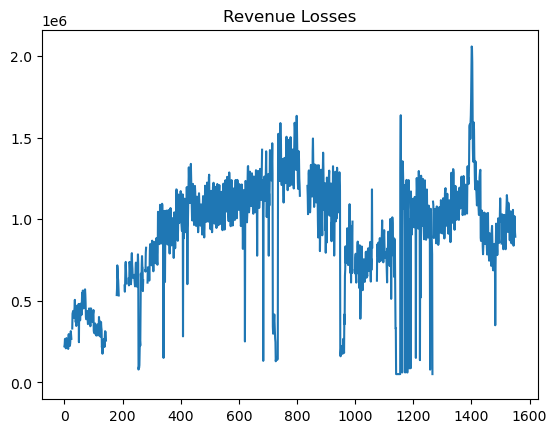

In [70]:
# Check train_df series
plt.plot(train_df['Revenue Losses'])
plt.title('Revenue Losses')
plt.show()

In [71]:
# Run prophet_forecast on train_df
model, forecast_df, orig_df, fitted_values = prophet_forecast(train_df)
forecast_values = forecast_df['yhat']
lower_series = forecast_df['yhat_lower']
upper_series = forecast_df['yhat_upper']

Prophet forecast started at: 2025-02-26 21:05:11
Empty DataFrame
Columns: [ds, y, Outlier]
Index: []
Data preparation completed in: 0.00 minutes


c:\Users\ijyli\repo\mcbroken-forecasting\Finalized Methodlogy\Testing\../Source\Prophet_Forecast_Functions.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_out_missing['y'], lam = stats.boxcox(no_out_missing['y'])
c:\Users\ijyli\repo\mcbroken-forecasting\Finalized Methodlogy\Testing\../Source\Prophet_Forecast_Functions.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Outlier_' + str(df['ds'][i])] = [1 if j == i else 0 for j in range(len(df))]
c:\Users\ijyli\repo\mcbroken-forecasting\Finalized Methodlogy

Feature creation completed in: 0.00 minutes
Created 164 outlier features
Starting hyperparameter optimization with Optuna...
Optimization will run for up to 100 trials or 10 minutes


21:05:12 - cmdstanpy - INFO - Chain [1] start processing
21:05:13 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\ijyli\.local\share\mamba\envs\mcbroken-forecasting\Lib\site-packages\prophet\forecaster.py:1272: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['trend'] = self.predict_trend(df)
[I 2025-02-26 21:05:13,547] Trial 0 finished with value: 921163400.2468913 and parameters: {'changepoint_prior_scale': 0.11592646792922284, 'seasonality_prior_scale': 9.077945039324018, 'changepoint_range': 0.8739151894187387}. Best is trial 0 with value: 921163400.2468913.
21:05:13 - cmdstanpy - INFO - Chain [1] start processing
21:05:14 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\ijyli\.local\share\mamba\envs\mcbroken-forecasting\Lib\site-packages

Hyperparameter optimization completed in: 3.00 minutes
Best parameters: {'changepoint_prior_scale': 0.10162476205333607, 'seasonality_prior_scale': 8.37007100669379, 'changepoint_range': 0.8173964763969122}
Best RMSE: 556368948.6446
Number of completed trials: 100
Fitting final Prophet model...


21:08:12 - cmdstanpy - INFO - Chain [1] start processing
21:08:13 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\ijyli\.local\share\mamba\envs\mcbroken-forecasting\Lib\site-packages\prophet\forecaster.py:1272: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['trend'] = self.predict_trend(df)


Final model fitting completed in: 0.05 minutes
Generating forecasts...


c:\Users\ijyli\repo\mcbroken-forecasting\Finalized Methodlogy\Testing\../Source\Prophet_Forecast_Functions.py:123: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future[col] = [0] * len(future)  # Set future outlier dummies to 0
c:\Users\ijyli\repo\mcbroken-forecasting\Finalized Methodlogy\Testing\../Source\Prophet_Forecast_Functions.py:123: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  future[col] = [0] * len(future)  # Set future outlier dummies to 0
c:\Users\ijyli\repo\mcbroken-forecasting\Finalized Methodlogy\Testing\../Sourc

Forecast generation completed in: 0.01 minutes
Inverse transformations completed in: 0.00 minutes


In [72]:
# Check residuals
def plot_prophet_residuals(df, fitted_values, lags=10, bins=20):
    """
    Generates and displays a suite of residual plots for Prophet.

    Args:
        df: The original DataFrame used to fit the model.
        fitted_values: The fitted values from the model.
        lags: Number of lags to plot in the ACF.
        bins: Number of bins for the histogram.
    """

    residuals = df['y'] - fitted_values['yhat']
    fitted_values = fitted_values['yhat']

    fig, axes = plt.subplots(3, 2, figsize=(15, 12))

    # 1. Time Series Plot of Residuals
    axes[0, 0].plot(df['ds'], residuals) # Plot against 'ds' (date)
    axes[0, 0].set_title('Residuals over Time')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].grid(True)

    # 2. Histogram of Residuals
    axes[0, 1].hist(residuals, bins=bins)
    axes[0, 1].set_title('Histogram of Residuals')
    axes[0, 1].set_xlabel('Residuals')
    axes[0, 1].set_ylabel('Frequency')

    # 3. Q-Q Plot
    stats.probplot(residuals, dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title('Q-Q Plot of Residuals')

    # 4. ACF Plot
    plot_acf(residuals, lags=lags, ax=axes[1, 1], title='Autocorrelation Function (ACF)') # Set title here
    #axes[1, 1].set_title('Autocorrelation Function (ACF)')  # No need to set title separately

    # 5. Residuals vs. Fitted Values
    axes[2, 0].scatter(fitted_values, residuals)
    axes[2, 0].set_title('Residuals vs. Fitted Values')
    axes[2, 0].set_xlabel('Fitted Values')
    axes[2, 0].set_ylabel('Residuals')
    axes[2, 0].grid(True)

    fig.delaxes(axes[2, 1])  # Remove the empty subplot

    plt.tight_layout()
    plt.show()


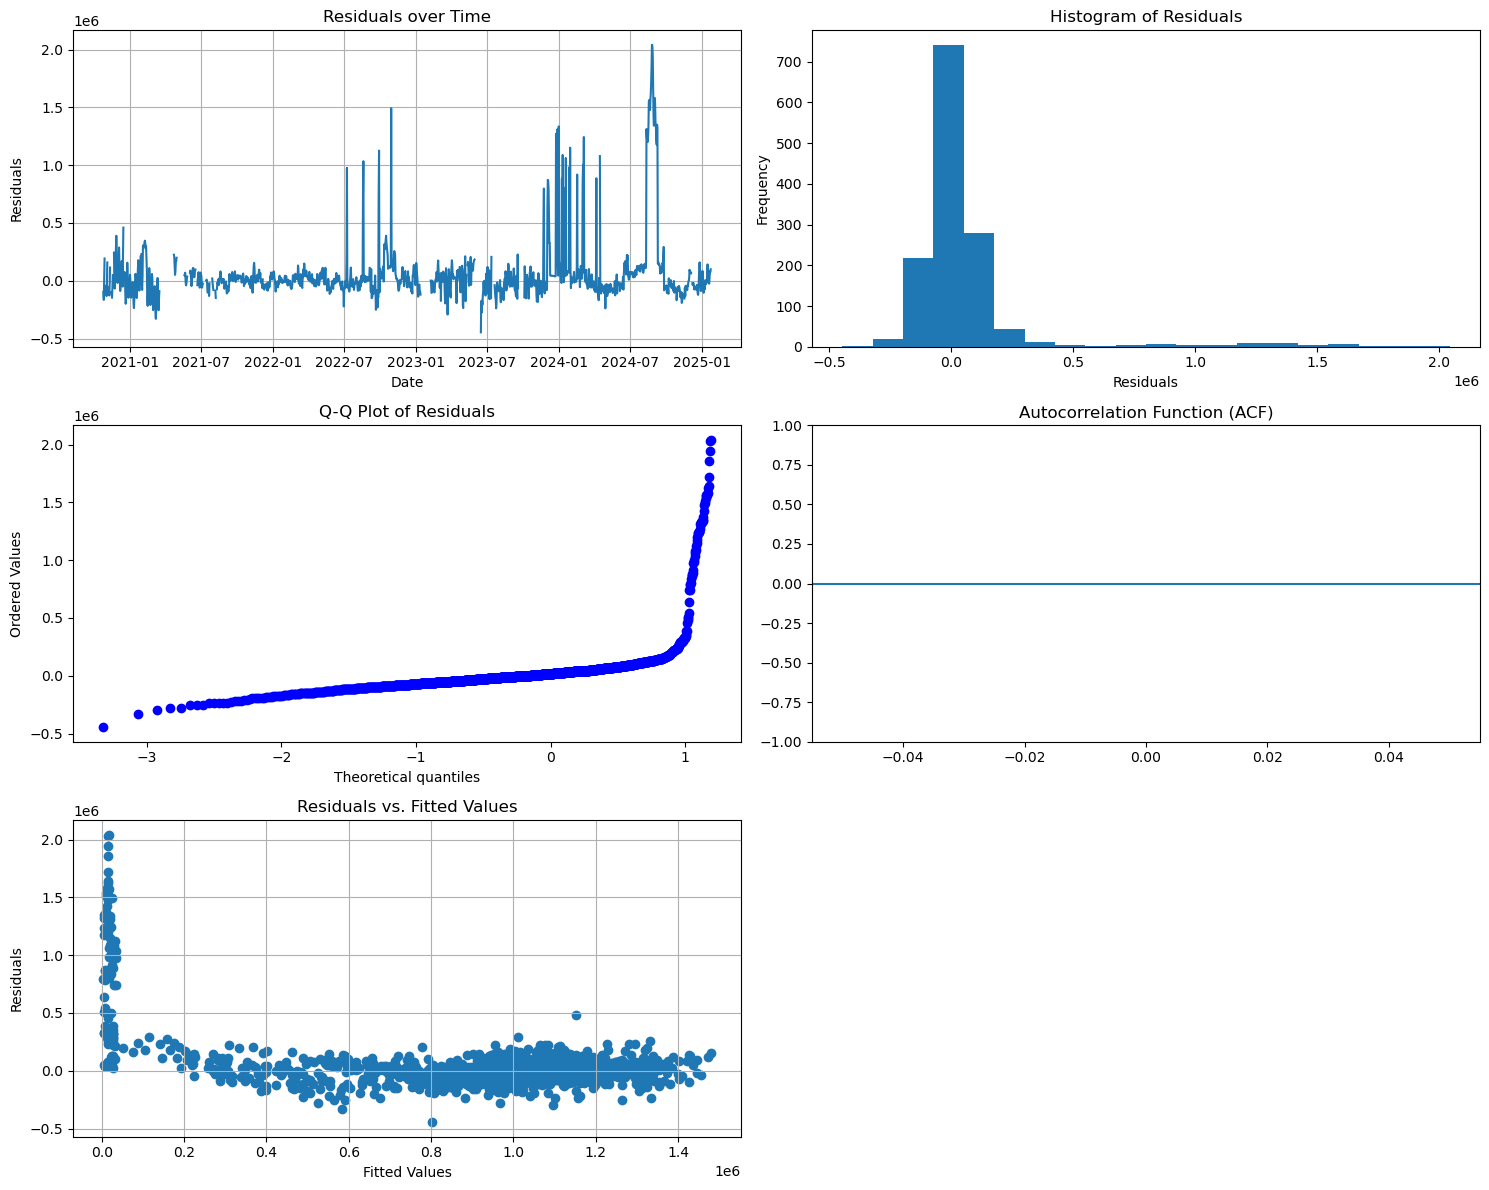

In [73]:
plot_prophet_residuals(orig_df, fitted_values)

In [74]:
# For plotting that follows, make orig_df orig_df plus test_df
# rename test_df 'Revenue Losses' to 'y', 'Date' to 'ds'
test_df = test_df.rename(columns={'Revenue Losses': 'y', 'Date': 'ds'})
print(test_df)
full_df = pd.concat([orig_df, test_df]).sort_values(by='ds')
print(full_df)

           ds  Broken Machines  Total Machines  Percent Broken          y  \
0  2025-01-24           1377.0         13395.0       10.279955   860625.0   
1  2025-01-25           1371.0         13277.0       10.326128   856875.0   
2  2025-01-26           1553.0         13446.0       11.549903   970625.0   
3  2025-01-27           1660.0         13135.0       12.637990  1037500.0   
4  2025-01-28           1507.0         12966.0       11.622706   941875.0   
5  2025-01-29           1375.0         12984.0       10.589957   859375.0   
6  2025-01-30           1302.0         12797.0       10.174260   813750.0   
7  2025-01-31           1097.0         11466.0        9.567417   685625.0   
8  2025-02-01           1142.0         11757.0        9.713362   713750.0   
9  2025-02-02           1292.0         11835.0       10.916772   807500.0   
10 2025-02-03           1401.0         11866.0       11.806843   875625.0   
11 2025-02-04           1288.0         11877.0       10.844489   805000.0   

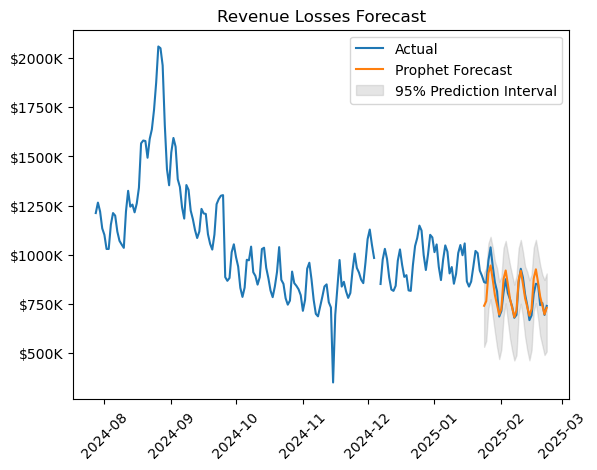

MAE: 38510.837596721605
RMSE: 50259.04569419429
MAPE: 4.585442159200523


In [75]:
plt.plot(full_df['ds'][-(180 + len(test_df)):], full_df['y'][-(180 + len(test_df)):], label="Actual")
plt.plot(full_df['ds'][-len(test_df):], forecast_df['yhat'][-len(test_df):], label="Prophet Forecast")
# Add prophet prediction intervals
plt.fill_between(full_df['ds'][-len(test_df):], forecast_df['yhat_lower'][-len(test_df):], forecast_df['yhat_upper'][-len(test_df):], color='gray', alpha=0.2, label='95% Prediction Interval')
# Title of Revenue Losses Forecast
plt.title('Revenue Losses Forecast')
# Format y axis as thousands of dollars
plt.gca().yaxis.set_major_formatter((lambda x, _: f'${int(x/1000)}K'))
# Rotate x axis labels
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Check MAE, RMSE on test set
mae = mean_absolute_error(test_df['y'], forecast_df['yhat'][-len(test_df):])
rmse = root_mean_squared_error(test_df['y'], forecast_df['yhat'][-len(test_df):])
print('MAE:', mae)
print('RMSE:', rmse)
# Also compute MAPE for reporting
mape = np.mean(np.abs((np.array(test_df['y']) - np.array(forecast_df['yhat'][-len(test_df):])) / np.array(test_df['y'])) * 100)
print('MAPE:', mape)

In [76]:
# 7-day seasonal naive forecast for comparison
last_7 = list(train_df['Revenue Losses'][-7:])
seasonal_naive_forecast = [last_7[i % 7] for i in range(len(test_df))]
# Set index of dates to be that of test_df
seasonal_naive_forecast_df = pd.DataFrame(seasonal_naive_forecast, index=test_df.index, columns=['y'])

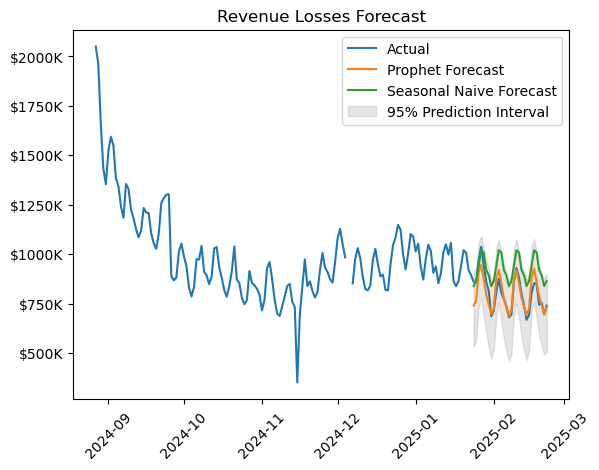

Seasonal Naive MAE: 121687.5
Seasonal Naive RMSE: 132294.89825449305
Seasonal Naive MAPE: 15.838210192694532


In [77]:
# PLot with seasonal naive forecast
plt.plot(full_df['ds'][-180:], full_df['y'][-180:], label="Actual")
plt.plot(full_df['ds'][-len(test_df):], forecast_df['yhat'][-len(test_df):], label="Prophet Forecast")
# Seasonal naive forecast
plt.plot(full_df['ds'][-len(test_df):], seasonal_naive_forecast_df['y'], label="Seasonal Naive Forecast")
# Add prophet prediction intervals
plt.fill_between(full_df['ds'][-len(test_df):], forecast_df['yhat_lower'][-len(test_df):], forecast_df['yhat_upper'][-len(test_df):], color='gray', alpha=0.2, label='95% Prediction Interval')
# Title of Revenue Losses Forecast
plt.title('Revenue Losses Forecast')
# Format y axis as thousands of dollars
plt.gca().yaxis.set_major_formatter((lambda x, _: f'${int(x/1000)}K'))
# Rotate x axis labels
plt.xticks(rotation=45)
plt.legend()
plt.show()

# MAE, RMSE, MAPE for seasonal naive forecast
mae = mean_absolute_error(test_df['y'], seasonal_naive_forecast)
rmse = np.sqrt(np.mean((test_df['y'] - seasonal_naive_forecast)**2))
print('Seasonal Naive MAE:', mae)
print('Seasonal Naive RMSE:', rmse)
mape = np.mean(np.abs((test_df['y'] - seasonal_naive_forecast) / test_df['y'])) * 100
print('Seasonal Naive MAPE:', mape)

Forecasts seem to be very good.